<a href="https://colab.research.google.com/github/roboy88/All-time-Men-s-Tennis-GOAT-Score-/blob/main/All_Time_Men's_Tennis_GOAT_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
from google.colab import files
import zipfile, os

# Upload the zip file manually in Colab
uploaded = files.upload()

# Extract
with zipfile.ZipFile("archive (3).zip", "r") as zip_ref:
    zip_ref.extractall("tennis_data")


Saving archive (3).zip to archive (3).zip


In [3]:
# Load the CSVs
rankings = pd.read_csv("tennis_data/YE_ATP_rankings.csv")
players = pd.read_csv("tennis_data/ltdPlayerMaster.csv")

# Preview
print(rankings.head())
print(players.head())


   index      DATE  RANKING  PLAYER_ID
0      0  19731214        1     100119
1      1  19731214        2     100087
2      2  19731214        3     100284
3      3  19731214        4     100084
4      4  19731214        5     100126
   index      ID  FIRST      LAST HAND   BIRTHDATE COUNTRY
0      0  100119   Ilie   Nastase    R  19460719.0     ROU
1      1  100087   John  Newcombe    R  19440523.0     AUS
2      2  100284  Jimmy   Connors    L  19520902.0     USA
3      3  100084    Tom     Okker    R  19440222.0     NED
4      4  100126   Stan     Smith    R  19461214.0     USA


In [4]:
# Merge rankings with player names
merged = rankings.merge(players, left_on="PLAYER_ID", right_on="ID")

# Convert date for year extraction
merged["DATE"] = pd.to_datetime(merged["DATE"], format="%Y%m%d")
merged["YEAR"] = merged["DATE"].dt.year


In [5]:
# Rank summary per player
career_stats = merged.groupby("PLAYER_ID").agg(
    full_name=("LAST", lambda x: x.iloc[0]),
    first_name=("FIRST", lambda x: x.iloc[0]),
    country=("COUNTRY", lambda x: x.iloc[0]),
    years_ranked=("YEAR", "nunique"),
    best_rank=("RANKING", "min"),
    worst_rank=("RANKING", "max"),
    avg_rank=("RANKING", "mean"),
    career_start=("YEAR", "min"),
    career_end=("YEAR", "max")
).reset_index()

# Format
career_stats["full_name"] = career_stats["first_name"] + " " + career_stats["full_name"]
career_stats = career_stats.drop(columns="first_name")


In [6]:
# Filter to players with significant careers
filtered = career_stats[career_stats["years_ranked"] >= 5]

# Score based on best + avg rank
filtered["GOAT_SCORE"] = (
    (1 / filtered["best_rank"]) * 0.6 +
    (1 / filtered["avg_rank"]) * 0.4
)

# Final GOAT table
goat_table = filtered.sort_values(by="GOAT_SCORE", ascending=False)
goat_table = goat_table.reset_index(drop=True)
goat_table.head(10)


<ipython-input-6-8ae3734bfb09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["GOAT_SCORE"] = (


,PLAYER_ID,full_name,country,years_ranked,best_rank,worst_rank,avg_rank,career_start,career_end,GOAT_SCORE
0,100656,Ivan Lendl,USA,17,1,74,12.176471,1978,1995,0.632850
1,101948,Pete Sampras,USA,15,1,87,13.133333,1989,2003,0.630457
2,104053,Andy Roddick,USA,13,1,156,21.153846,2001,2013,0.618909
3,101222,Stefan Edberg,SWE,15,1,523,44.600000,1983,1997,0.608969
4,101736,Andre Agassi,USA,22,1,615,50.000000,1986,2007,0.608000
5,103819,Roger Federer,SUI,19,1,704,60.105263,1998,2016,0.606655
6,101793,Jim Courier,USA,14,1,348,64.285714,1988,2001,0.606222
7,104925,Novak Djokovic,SRB,13,1,679,75.153846,2004,2016,0.605322
8,104745,Rafael Nadal,ESP,15,1,810,75.533333,2002,2016,0.605296
9,103720,Lleyton Hewitt,AUS,19,1,550,83.842105,1998,2016,0.604771


<ipython-input-7-a2a824b1bf70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10["full_name"], x=top10["GOAT_SCORE"], palette="viridis")


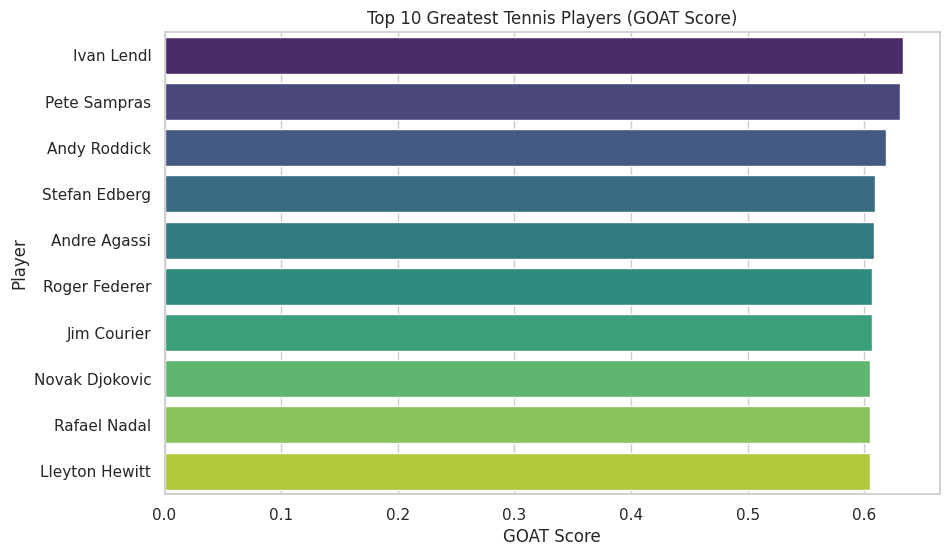

In [7]:
top10 = goat_table.head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top10["full_name"], x=top10["GOAT_SCORE"], palette="viridis")
plt.title("Top 10 Greatest Tennis Players (GOAT Score)")
plt.xlabel("GOAT Score")
plt.ylabel("Player")
plt.show()
